In [1]:
import cv2
import os

# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1
bbox_with_labels = []

# Function to save bounding boxes in YOLOv4 format
def save_bboxes_yolo_format(file_name, bboxes, img_width, img_height):
    with open(file_name, 'w') as f:
        for bbox in bboxes:
            x, y, w, h = bbox[0]
            label = bbox[1]
            f.write(f"{label} {x} {y} {w} {h}\n")


# Mouse callback function
def draw_bbox(event, x, y, flags, param):
    global ix, iy, drawing, bbox_with_labels, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_temp = img.copy()
            cv2.rectangle(img_temp, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow('image', img_temp)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        label = input("Enter label for the bounding box: ")  # Prompt the user to enter a label
        w = x - ix
        h = y - iy
        bbox_with_labels.append(((ix, iy, w, h), label))
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.putText(img, label, (ix, iy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow('image', img)

# Read the image
img_path = r"C:\Users\ALL USER\Desktop\e\all_data\blackhole\test\44.png"
img = cv2.imread(img_path)
img_height, img_width, _ = img.shape
original_img = img.copy()  # Make a copy of the original image

# Create a window and set mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_bbox)

while True:
    cv2.imshow('image', img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('d') and bbox_with_labels:
        bbox_with_labels.pop()  # Remove the last drawn bounding box with label
        img = original_img.copy()  # Reset to the original image
        for box, label in bbox_with_labels:
            x, y, w, h = box
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow('image', img)

cv2.destroyAllWindows()
normalized_bbox = []

for box, label in bbox_with_labels:
    x, y, w, h = box
    
    # Calculate normalized coordinates
    center_x = (x + w / 2) / img_width  # Center x
    center_y = (y + h / 2) / img_height  # Center y
    width_normalized = w / img_width
    height_normalized = h / img_height
    
    # Store bounding box in YOLOv8 format
    yolo_format_bbox = [center_x, center_y, width_normalized, height_normalized]
    # Save bounding boxes in YOLOv4 format
    normalized_bbox.append((yolo_format_bbox,label))
    
    
output_dir = os.path.dirname(img_path)
yolo_text_file = os.path.splitext(img_path)[0] + ".txt"
save_bboxes_yolo_format(yolo_text_file, normalized_bbox, img_width, img_height)

print("Bounding boxes saved in YOLOv4 format at:", yolo_text_file)


Enter label for the bounding box:  0
Enter label for the bounding box:  1
Enter label for the bounding box:  2


Bounding boxes saved in YOLOv4 format at: C:\Users\ALL USER\Desktop\e\all_data\blackhole\test\44.txt


In [ ]:
import cv2
import os

# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1
bbox_with_labels = []
img = None  # Declare img as global variable

# Function to save bounding boxes in YOLOv4 format
def save_bboxes_yolo_format(file_name, bboxes, img_width, img_height):
    with open(file_name, 'w') as f:
        for bbox in bboxes:
            x, y, w, h = bbox[0]
            label = bbox[1]
            f.write(f"{label} {x} {y} {w} {h}\n")

# Mouse callback function
def draw_bbox(event, x, y, flags, param):
    global ix, iy, drawing, bbox_with_labels, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_temp = img.copy()
            cv2.rectangle(img_temp, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow('image', img_temp)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        label = input("Enter label for the bounding box: ")  # Prompt the user to enter a label
        w = x - ix
        h = y - iy
        bbox_with_labels.append(((ix, iy, w, h), label))
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.putText(img, label, (ix, iy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow('image', img)

# Function to annotate images in a directory
def annotate_images_in_directory(directory):
    global img  # Declare img as global variable
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img_height, img_width, _ = img.shape
            original_img = img.copy()  # Make a copy of the original image

            # Create a window and set mouse callback
            cv2.namedWindow('image')
            cv2.setMouseCallback('image', draw_bbox)

            while True:
                cv2.imshow('image', img)
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q'):
                    break
                elif key == ord('d') and bbox_with_labels:
                    bbox_with_labels.pop()  # Remove the last drawn bounding box with label
                    img = original_img.copy()  # Reset to the original image
                    for box, label in bbox_with_labels:
                        x, y, w, h = box
                        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1,
                                    cv2.LINE_AA)
                    cv2.imshow('image', img)

            cv2.destroyAllWindows()
            normalized_bbox = []

            for box, label in bbox_with_labels:
                x, y, w, h = box

                # Calculate normalized coordinates
                center_x = (x + w / 2) / img_width  # Center x
                center_y = (y + h / 2) / img_height  # Center y
                width_normalized = w / img_width
                height_normalized = h / img_height

                # Store bounding box in YOLOv8 format
                yolo_format_bbox = [center_x, center_y, width_normalized, height_normalized]
                # Save bounding boxes in YOLOv4 format
                normalized_bbox.append((yolo_format_bbox, label))

            output_dir = os.path.dirname(img_path)
            yolo_text_file = os.path.splitext(img_path)[0] + ".txt"
            save_bboxes_yolo_format(yolo_text_file, normalized_bbox, img_width, img_height)

            print("Bounding boxes saved in YOLOv4 format at:", yolo_text_file)

# Define the directory containing images
image_directory = r"C:\Users\ALL USER\Desktop\e\all_data\blackhole\test"

# Call function to annotate images in the directory
annotate_images_in_directory(image_directory)


Enter label for the bounding box:  0
Enter label for the bounding box:  1
Enter label for the bounding box:  2
Enter label for the bounding box:  4


Bounding boxes saved in YOLOv4 format at: C:\Users\ALL USER\Desktop\e\all_data\blackhole\test\44.txt


Enter label for the bounding box:  2


Bounding boxes saved in YOLOv4 format at: C:\Users\ALL USER\Desktop\e\all_data\blackhole\test\45.txt


In [ ]:
import cv2
import os

# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1
bbox_with_labels = []

# Function to save bounding boxes in YOLOv8 format
def save_bboxes_yolov8_format(file_name, bboxes, img_width, img_height):
    with open(file_name, 'w') as f:
        for bbox in bboxes:
            bbox_coords = bbox[0]
            label = bbox[1]
            x1, y1, x2, y2 = bbox_coords
            center_x = (x1 + x2) / (2 * img_width)
            center_y = (y1 + y2) / (2 * img_height)
            width_normalized = (x2 - x1) / img_width
            height_normalized = (y2 - y1) / img_height
            f.write(f"{label} {center_x} {center_y} {width_normalized} {height_normalized}\n")

# Function to save bounding boxes in YOLOv4 format
def save_bboxes_yolo_format(file_name, bboxes, img_width, img_height):
    with open(file_name, 'w') as f:
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox[0]
            label = bbox[1]

            f.write(f"{label} {x1} {y1} {x2} {y2}\n")


# Mouse callback function
def draw_bbox(event, x, y, flags, param):
    global ix, iy, drawing, bbox_with_labels
    img = param['img']

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_temp = img.copy()
            cv2.rectangle(img_temp, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow('image', img_temp)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        label = input("Enter label for the bounding box: ")  # Prompt the user to enter a label
        bbox_with_labels.append(((ix, iy, x, y), label))
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.putText(img, label, (ix, iy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow('image', img)

# Function to process all images in a directory
def process_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img_height, img_width, _ = img.shape
            original_img = img.copy()  # Make a copy of the original image

            # Create a window and set mouse callback
            cv2.namedWindow('image')
            cv2.setMouseCallback('image', draw_bbox, {'img': img})

            while True:
                cv2.imshow('image', img)
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q'):
                    break
                elif key == ord('d') and bbox_with_labels:
                    bbox_with_labels.pop()  # Remove the last drawn bounding box with label
                    img = original_img.copy()  # Reset to the original image
                    for box, label in bbox_with_labels:
                        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
                        cv2.putText(img, label, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.imshow('image', img)

            cv2.destroyAllWindows()

            # Convert bounding boxes to normalized format and save in YOLOv8 format
            normalized_bbox_with_labels = []
            for box, label in bbox_with_labels:
                x1, y1, x2, y2 = box
                normalized_x1 = x1 / img_width
                normalized_y1 = y1 / img_height
                normalized_x2 = x2 / img_width
                normalized_y2 = y2 / img_height
                normalized_bbox_with_labels.append(((normalized_x1, normalized_y1, normalized_x2, normalized_y2), label))

            # Save bounding boxes in YOLOv8 format
            output_dir = os.path.dirname(img_path)
            yolo_text_file = os.path.splitext(img_path)[0] + ".txt"
            save_bboxes_yolo_format(yolo_text_file, normalized_bbox_with_labels, img_width, img_height)

            print("Bounding boxes saved in YOLOv8 format at:", yolo_text_file)

# Directory containing images
image_directory = r"C:\Users\ALL USER\Desktop\e\all_data\blackhole\test"
process_images_in_directory(image_directory)


Enter label for the bounding box:  0
Enter label for the bounding box:  1
Enter label for the bounding box:  2


Bounding boxes saved in YOLOv8 format at: C:\Users\ALL USER\Desktop\e\all_data\blackhole\test\44.txt


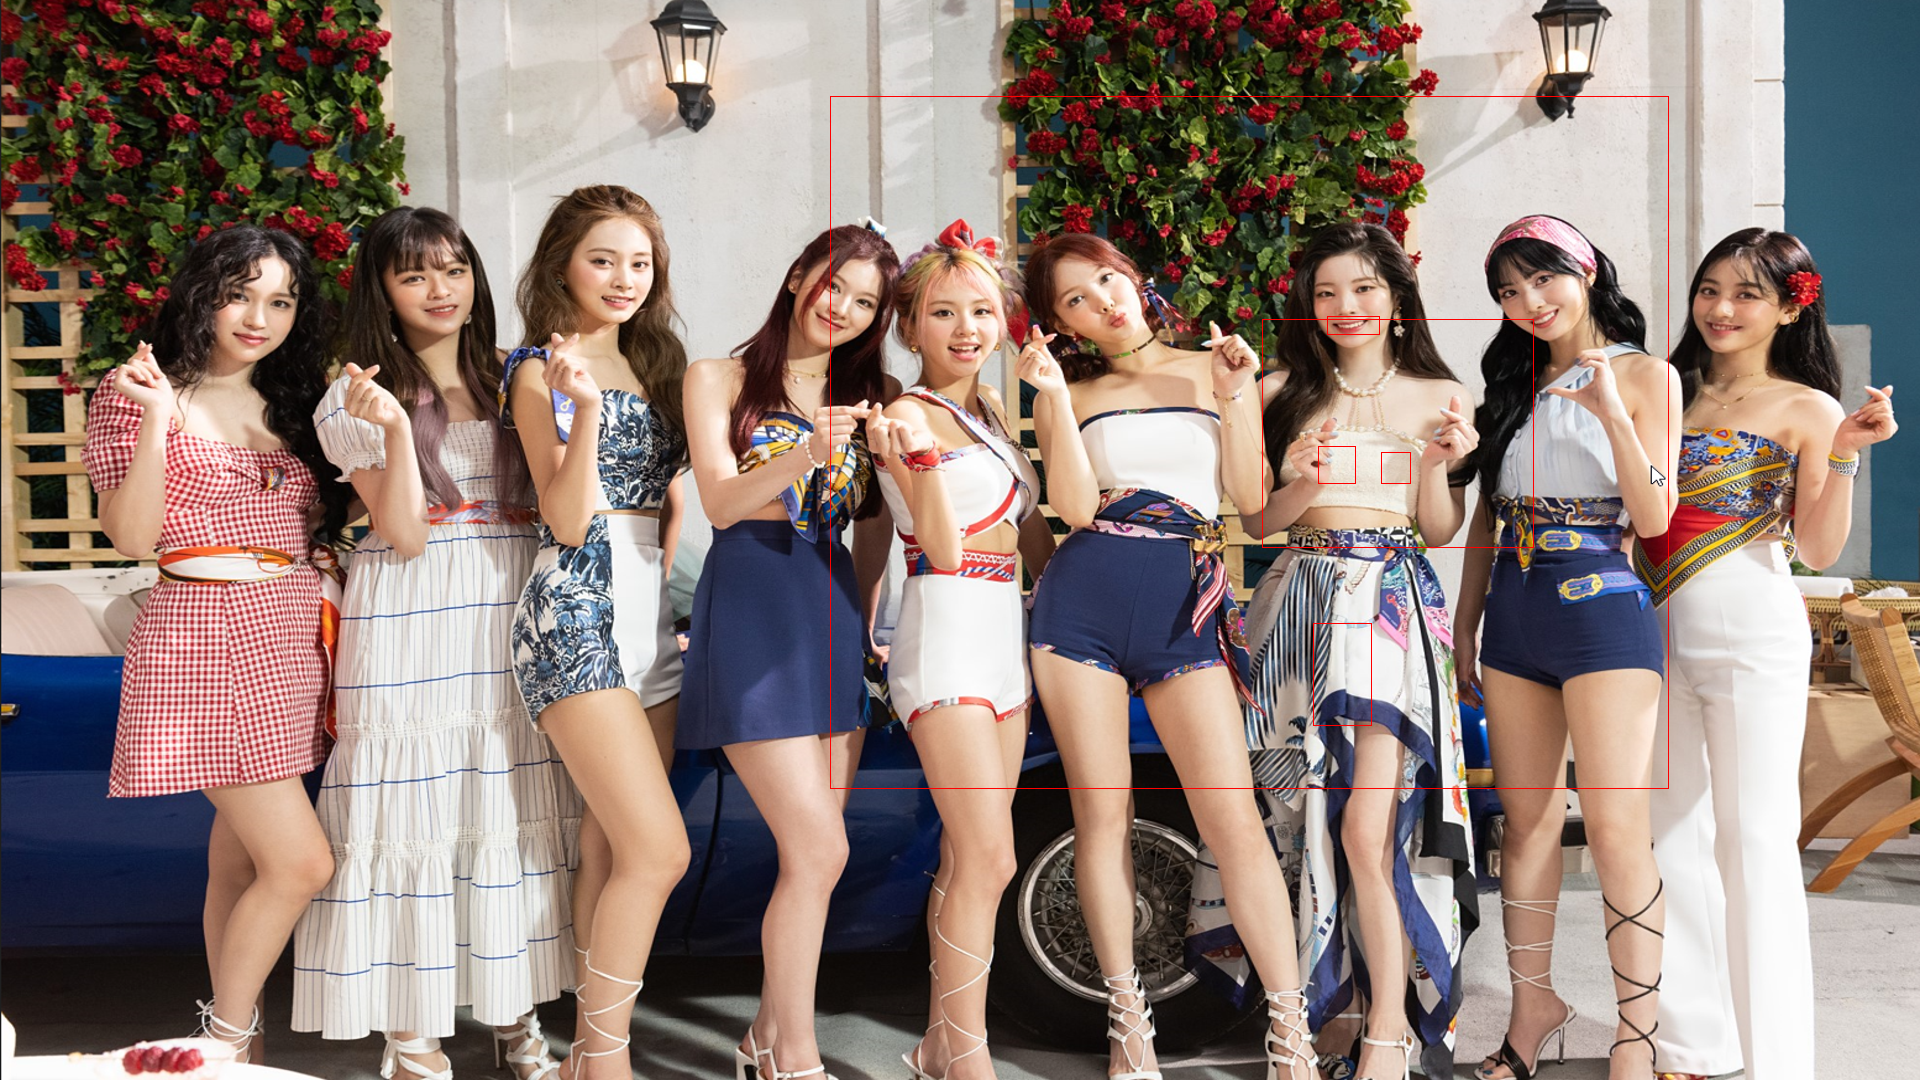

In [6]:
from PIL import Image, ImageDraw

# Read the image using Pillow
image_path = r"C:\\Users\\ALL USER\\Desktop\\computervision_project\\movie\\image\\result_image.png"
image = Image.open(image_path)

# Get image dimensions
img_width, img_height = image.size

# Create drawing object
draw = ImageDraw.Draw(image)

# Convert normalized bounding box coordinates to image coordinates
for box in normalized_bbox:
    x1 = box[0] * img_width
    y1 = box[1] * img_height
    x2 = box[2] * img_width
    y2 = box[3] * img_height

    # Draw bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red")

# Show the image with bounding boxes
image

In [4]:
from PIL import Image, ImageDraw

# Read the image using Pillow
image_path = "C:\\Users\\ALL USER\\Desktop\\computervision_project\\movie\\image\\result_image.png"
image = Image.open(image_path)

# Get image dimensions
img_width, img_height = image.size

# Create drawing object
draw = ImageDraw.Draw(image)

# Convert normalized bounding box coordinates with labels to image coordinates
for box, label in normalized_bbox_with_labels:
    x1 = box[0] * img_width
    y1 = box[1] * img_height
    x2 = box[2] * img_width
    y2 = box[3] * img_height

    # Draw bounding box
    draw.rectangle([x1, y1, x2, y2], outline="red")

    # Add label
    draw.text((x1, y1), label, fill="blue")

# Show the image with bounding boxes and labels
image.show()